In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #image ka leya hota hai
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

C:\Users\hp\Music\anoconda\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(
    "flower_photos",
    origin=dataset_url,
    cache_dir=".", # save dataset
    untar=True
)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
# windows ka path hai
from pathlib import Path

data_dir = Path(data_dir)      
data_dir = data_dir / "flower_photos"


In [5]:
data_dir.exists()

True

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

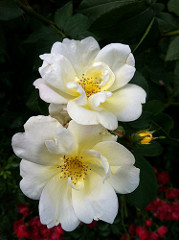

In [8]:
PIL.Image.open(str(roses[0]))

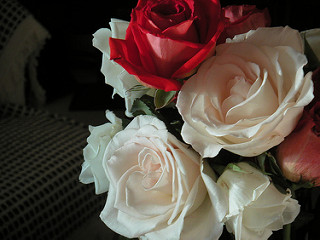

In [9]:
PIL.Image.open(str(roses[1]))

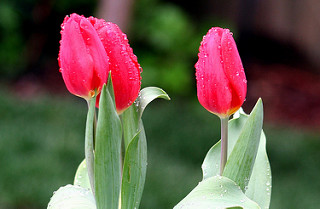

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}


In [12]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}
    

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape


(240, 179, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [16]:
x = np.array(x)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [18]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [19]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=5)              

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 264ms/step - accuracy: 0.4197 - loss: 1.4057
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.6043 - loss: 0.9898
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.6933 - loss: 0.8256
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.7580 - loss: 0.6440
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.8430 - loss: 0.4403


In [20]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6743 - loss: 0.9776 


[0.9775742888450623, 0.6742919683456421]

In [21]:
predictions =model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step 


array([[-0.2299306 ,  3.5401366 ,  0.7621711 , -7.153345  , -2.9538019 ],
       [ 2.9500456 , -4.002715  , -2.8338203 , -3.0610278 , -0.19852144],
       [-0.98638195,  1.1511451 ,  5.283293  , -4.3975105 , -1.9576209 ],
       ...,
       [-1.7885351 , -3.902386  , -2.1796908 ,  1.6334841 , -1.0298805 ],
       [ 0.3472099 , -0.55450535,  0.07395685, -1.4872512 ,  0.67824334],
       [-0.15010439, -6.1919627 , -0.95277166,  1.0501673 , -0.6916546 ]],
      dtype=float32)

In [22]:
score = tf.nn.softmax(predictions[0])


In [23]:
np.argmax(score)

np.int64(1)

In [24]:
y_test[0]

np.int64(1)

In [25]:
img_height = 180
img_width  = 180

In [26]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.1),
])

C:\Users\hp\Music\anoconda\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


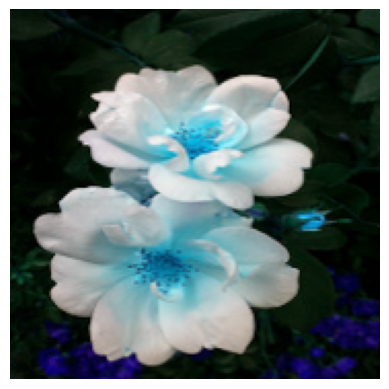

In [27]:
plt.axis('off')
plt.imshow(x[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))